In [5]:
from datasets import load_dataset

# Load private dataset
#dataset = load_dataset("mikeriess/LM_Da_test_100_llama-3.3-70b-instruct")
#dataset = load_dataset("mikeriess/LM_Da_test_100_llama-3.1-405b-instruct-fp8")
dataset = load_dataset("mikeriess/LM_dialogues1")

In [6]:
# Convert to pandas and then to dictionary format
df = dataset['train'].to_pandas()
df.head()

,model,conversation_id,orig_messages,synthetic_messages,orig_message_count,synthetic_message_count,message_count_diff,orig_total_length,synthetic_total_length,orig_total_tokens,synthetic_total_tokens
0,meta-llama/Llama-3.1-405B-Instruct-FP8,29,"[{'order': 1, 'text': 'Jeg tillader mig lige a...","[{'order': 1, 'text': 'Hej, jeg søger efter no...",6,6,0,1716,227,324,227
1,meta-llama/Llama-3.1-405B-Instruct-FP8,474,"[{'order': 1, 'text': 'Hej Allesammen Ved godt...","[{'order': 1, 'text': 'Hej, jeg søger hjælp ti...",6,6,0,1485,299,277,299
2,meta-llama/Llama-3.1-405B-Instruct-FP8,651,"[{'order': 1, 'text': '..skal også til. Jeg er...","[{'order': 1, 'text': 'Hej, jeg har længe være...",8,8,0,2959,304,585,304
3,meta-llama/Llama-3.1-405B-Instruct-FP8,668,"[{'order': 1, 'text': 'sampler i meget når i l...","[{'order': 1, 'text': 'Hej, jeg er i gang med ...",6,6,0,1774,306,312,306
4,meta-llama/Llama-3.1-405B-Instruct-FP8,897,"[{'order': 1, 'text': 'nogen der ved hvordan m...","[{'order': 1, 'text': 'Hej, jeg arbejder på et...",2,2,0,284,79,52,79


In [7]:
print(df.loc[53]['synthetic_messages'])

[{'order': 1, 'text': 'Hej, jeg har købt en elektrisk guitarforstærker i USA, som kun kan køre på 110V. Jeg ved, jeg skal bruge en adapter til at køre den på 230V herhjemme, men jeg er lidt bekymret for, om det vil påvirke lyden eller funktionen. Har du nogen erfaring med lignende udstyr?', 'turn': 1, 'user': 1}
 {'order': 2, 'text': 'Ja, jeg har selv købt en del udstyr i USA, inklusive en guitarforstærker. Jeg har brugt en step-down-transformator til at køre den på 230V, og jeg har ikke oplevet nogen problemer med lyden eller funktionen.', 'turn': 1, 'user': 2}
 {'order': 3, 'text': 'En step-down-transformator? Er det ikke bare en adapter, man skal bruge? Jeg troede, det var nok at bruge en almindelig adapter til at køre udstyret på 230V.', 'turn': 2, 'user': 1}
 {'order': 4, 'text': 'Nej, en adapter er ikke nok i dette tilfælde. En adapter vil kun ændre stikket, men ikke spændingen. En step-down-transformator derimod vil sænke spændingen fra 230V til 110V, så udstyret kan køre sikker

# Inspect original vs synthetic messages

In [8]:
def inspect_conversation_pair(df, idx):
    """
    Display original and synthetic messages side by side for a given conversation index
    """
    orig = df.iloc[idx]['orig_messages']
    synth = df.iloc[idx]['synthetic_messages']
    
    print(f"Conversation #{idx}")
    print("=" * 100)
    print("\nOriginal Messages:")
    print("-" * 50)
    for msg in orig:
        print(f"Turn {msg['order']} (User {msg.get('user', 'N/A')}):")
        print(f"{msg['text']}\n")
    
    print("\nSynthetic Messages:")
    print("-" * 50)
    for msg in synth:
        print(f"Turn {msg['order']} (User {msg.get('user', 'N/A')}):")
        print(f"{msg['text']}\n")
    
    print("=" * 100)

# Example usage:
inspect_conversation_pair(df, 5)  # View first conversation


Conversation #5

Original Messages:
--------------------------------------------------
Turn 1 (User 219.0):
Er der nogen hér der kender til en god (ikke alt for dyr) snedker eller handyman, der kan skrue et veludseende studiemøbel sammen. Skal have det lavet lidt specielt, og kan derfor ikke bruge standard studiemøbler såsom Studio RTA og lign. Håber nogen ved noget og kan hjælpe :)

Turn 2 (User 2.0):
Henrik Øhlers.. prøv at slå ham op på De Gule. Kan ikke huske hans website lige nu.
Alt afhængig af størrelse/design, så regn med omkring 25k for et lille bord og op til 50k for et større bord. Det er faktisk ikke så slemt igen for custom lavet møbel.

Turn 3 (User 20.0):
Har gemt linket siden sidst du havde ham oppe at vende Holger..
her er det: [URL]
jeg er iøvrigt helt vild med den hvide hestesko han har lavet.. Bagrund>lydstudier

Turn 4 (User 2.0):
Coolio, han har også lavet min konsol i studiet, men læderbetræk omkring skumgummi hvor armene hviler, indsunket og svagt skrånene i bor

## Tokens

In [9]:
df.columns

Index(['model', 'conversation_id', 'orig_messages', 'synthetic_messages',
       'orig_message_count', 'synthetic_message_count', 'message_count_diff',
       'orig_total_length', 'synthetic_total_length', 'orig_total_tokens',
       'synthetic_total_tokens'],
      dtype='object')

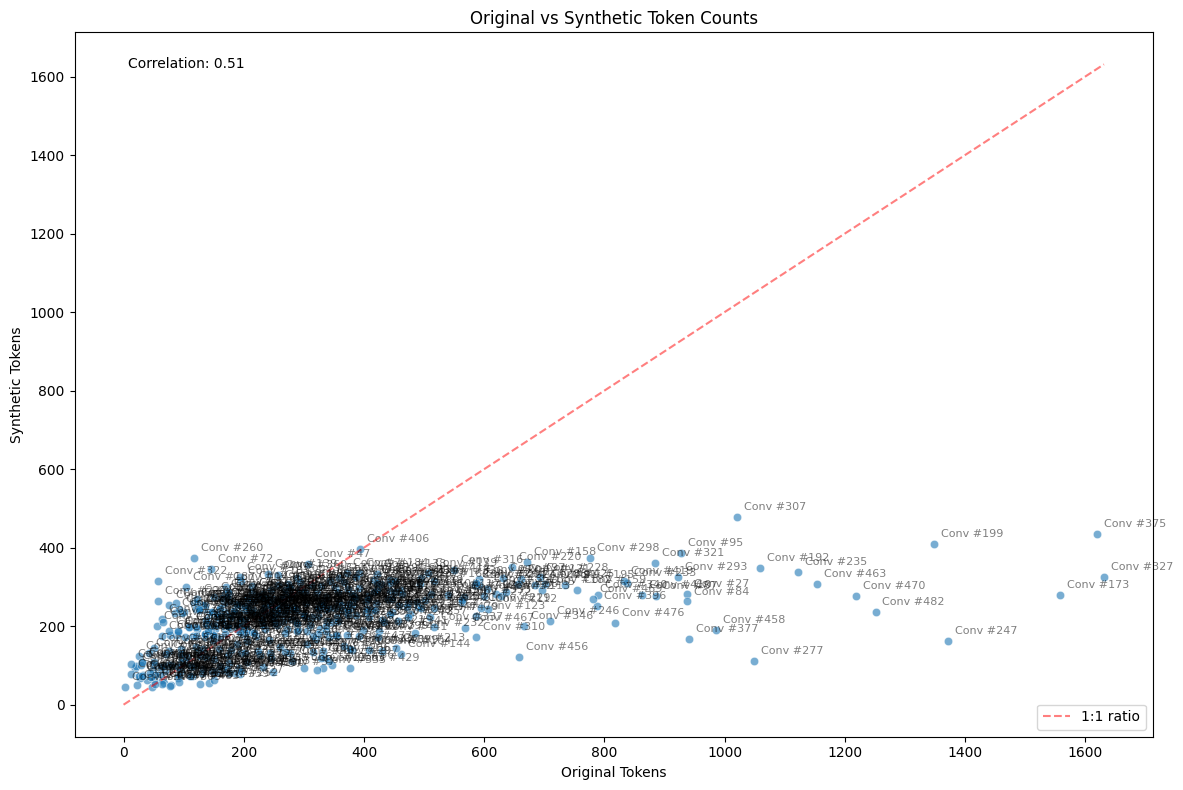


Token Count Statistics:
--------------------------------------------------
Average original tokens: 309.5
Average synthetic tokens: 214.6
Median original tokens: 249.0
Median synthetic tokens: 229.0

Correlation coefficient: 0.510


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, 
                x='orig_total_tokens', 
                y='synthetic_total_tokens',
                alpha=0.6)

# Add diagonal line representing y=x
max_tokens = max(df['orig_total_tokens'].max(), df['synthetic_total_tokens'].max())
plt.plot([0, max_tokens], [0, max_tokens], 'r--', alpha=0.5, label='1:1 ratio')

# Customize plot
plt.title('Original vs Synthetic Token Counts')
plt.xlabel('Original Tokens')
plt.ylabel('Synthetic Tokens')
plt.legend()

# Add correlation coefficient
correlation = df['orig_total_tokens'].corr(df['synthetic_total_tokens'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes)

# Optional: Add hover annotations
for idx, row in df.iterrows():
    plt.annotate(f'Conv #{idx}',
                (row['orig_total_tokens'], row['synthetic_total_tokens']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.5)

plt.tight_layout()
plt.show()

# Print some basic statistics
print("\nToken Count Statistics:")
print("-" * 50)
print(f"Average original tokens: {df['orig_total_tokens'].mean():.1f}")
print(f"Average synthetic tokens: {df['synthetic_total_tokens'].mean():.1f}")
print(f"Median original tokens: {df['orig_total_tokens'].median():.1f}")
print(f"Median synthetic tokens: {df['synthetic_total_tokens'].median():.1f}")
print(f"\nCorrelation coefficient: {correlation:.3f}")


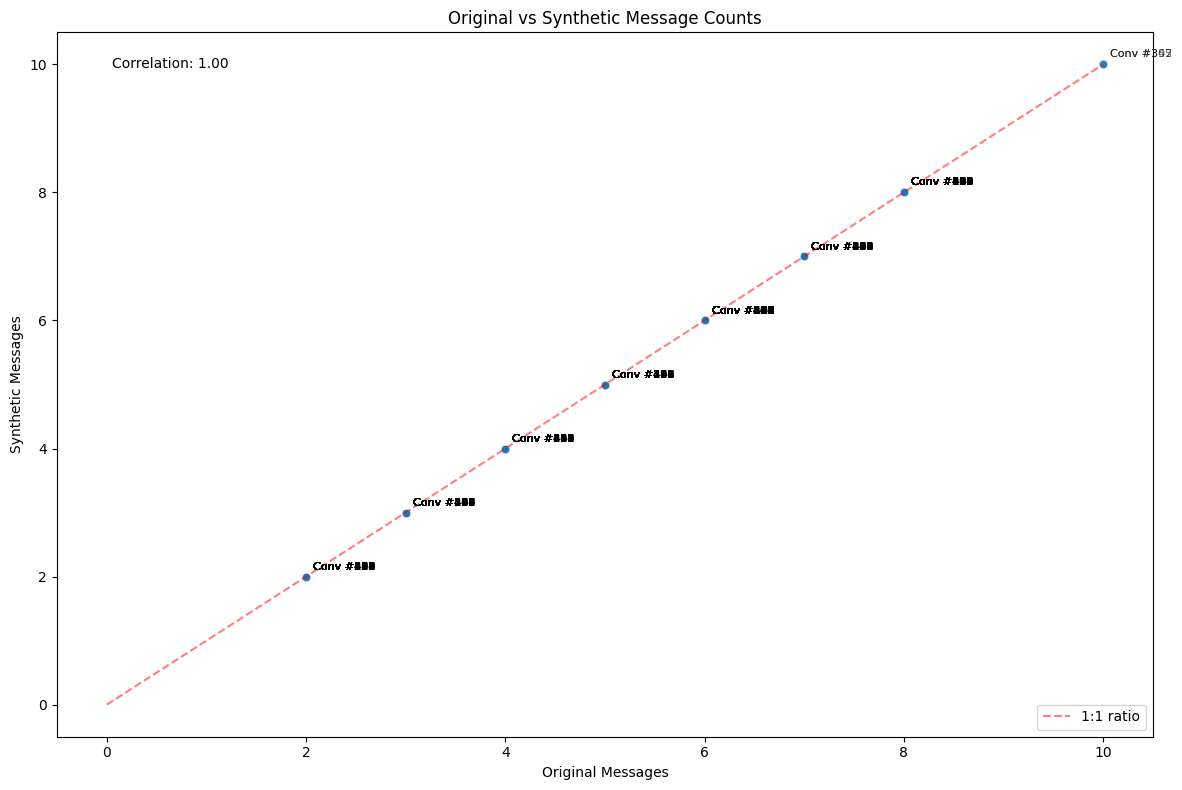


Message Count Statistics:
--------------------------------------------------
Average original messages: 5.5
Average synthetic messages: 5.5
Median original messages: 6.0
Median synthetic messages: 6.0

Correlation coefficient: 1.000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot for message counts
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, 
                x='orig_message_count', 
                y='synthetic_message_count',
                alpha=0.6)

# Add diagonal line representing y=x
max_count = max(df['orig_message_count'].max(), df['synthetic_message_count'].max())
plt.plot([0, max_count], [0, max_count], 'r--', alpha=0.5, label='1:1 ratio')

# Customize plot
plt.title('Original vs Synthetic Message Counts')
plt.xlabel('Original Messages')
plt.ylabel('Synthetic Messages')
plt.legend()

# Add correlation coefficient
correlation = df['orig_message_count'].corr(df['synthetic_message_count'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes)

# Optional: Add hover annotations
for idx, row in df.iterrows():
    plt.annotate(f'Conv #{idx}',
                (row['orig_message_count'], row['synthetic_message_count']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.5)

plt.tight_layout()
plt.show()

# Print some basic statistics
print("\nMessage Count Statistics:")
print("-" * 50)
print(f"Average original messages: {df['orig_message_count'].mean():.1f}")
print(f"Average synthetic messages: {df['synthetic_message_count'].mean():.1f}")
print(f"Median original messages: {df['orig_message_count'].median():.1f}")
print(f"Median synthetic messages: {df['synthetic_message_count'].median():.1f}")
print(f"\nCorrelation coefficient: {correlation:.3f}")

# Convert to ChatML format

In [12]:
# Convert dataset to pandas
df = dataset['train'].to_pandas()

# Group by question_id and concatenate conversations
chatml_data = {}
for idx, row in df.iterrows():
    # Create messages list
    messages = []
    for message in row['synthetic_messages']:
        # Determine role based on user field
        # Assuming user 1 is the questioner (user) and user 2 is the answerer (assistant)
        role = "user" if message['user'] == 1 else "assistant"
        
        messages.append({
            "role": role,
            "content": message['text']
        })
    
    # Generate a unique ID if question_id doesn't exist
    question_id = row.get('question_id', f"synthetic_{idx}")
    
    # Store in chatml format
    chatml_data[question_id] = {
        "messages": messages,
        "language": "Danish"  # Assuming all messages are in Danish
    }

# Print sample to verify format
print("Sample conversation:")
sample_id = list(chatml_data.keys())[0]
print(f"\nQuestion ID: {sample_id}")
print(f"Language: {chatml_data[sample_id]['language']}")
print("\nMessages:")
for msg in chatml_data[sample_id]['messages']:
    print(f"{msg['role']}: {msg['content']}\n")

Sample conversation:

Question ID: synthetic_0
Language: Danish

Messages:
user: Hej, jeg søger efter nogle solide højtaler-stande til mine nye højtalere, som vejrer 20 kg hver. Jeg har set på SoundAnchors, men ville gerne høre, om der er andre mærker, der kan anbefales?

assistant: Hej! Ja, SoundAnchors er et godt mærke, men der er også andre muligheder. Jeg har selv haft gode erfaringer med Atacama, som laver nogle rigtig solide og stabile stande. De har også en del forskellige modeller, der passer til forskellige vægtklasser.

user: Tak for tippet! Jeg vil lige kigge på Atacama. Er der noget, jeg skal være særligt opmærksom på, når jeg vælger en stand? Jeg har hørt, at justerbar højde kan være en god ting, men jeg er mere bekymret for stabiliteten.

assistant: Ja, stabilitet er absolut det vigtigste. Du skal sikre dig, at standene kan bære vægten af dine højtalere uden at vakle eller tippe. Justerbar højde kan være praktisk, men det er ikke nødvendigt, hvis du har en fast installati

In [13]:
chatml_data

{'synthetic_0': {'messages': [{'role': 'user',
    'content': 'Hej, jeg søger efter nogle solide højtaler-stande til mine nye højtalere, som vejrer 20 kg hver. Jeg har set på SoundAnchors, men ville gerne høre, om der er andre mærker, der kan anbefales?'},
   {'role': 'assistant',
    'content': 'Hej! Ja, SoundAnchors er et godt mærke, men der er også andre muligheder. Jeg har selv haft gode erfaringer med Atacama, som laver nogle rigtig solide og stabile stande. De har også en del forskellige modeller, der passer til forskellige vægtklasser.'},
   {'role': 'user',
    'content': 'Tak for tippet! Jeg vil lige kigge på Atacama. Er der noget, jeg skal være særligt opmærksom på, når jeg vælger en stand? Jeg har hørt, at justerbar højde kan være en god ting, men jeg er mere bekymret for stabiliteten.'},
   {'role': 'assistant',
    'content': 'Ja, stabilitet er absolut det vigtigste. Du skal sikre dig, at standene kan bære vægten af dine højtalere uden at vakle eller tippe. Justerbar højde

In [14]:

print("Sample conversation:")
sample_id = list(chatml_data.keys())[1]
print(f"\nQuestion ID: {sample_id}")
print(f"Language: {chatml_data[sample_id]['language']}")
print("\nMessages:")
for msg in chatml_data[sample_id]['messages']:
    #print(f"{msg['role']}: {msg['content'][:100]}...")
    print(f"{msg['role']}: {msg['content']}"+ "\n")

Sample conversation:

Question ID: synthetic_1
Language: Danish

Messages:
user: Hej, jeg søger hjælp til at vælge en bærbar computer til musikproduktion. Jeg har hørt, at Logic Express/Pro kan køre på en ældre PowerBook G4, men jeg er usikker på, om det vil være tilstrækkelig til mine behov. Har du erfaring med at bruge Logic på en lignende maskine?

assistant: Ja, jeg har brugt Logic Express på en PowerBook G4 1.5 Ghz med 1 Gb ram, og det fungerede fint for små projekter. Men hvis du planlægger at arbejde med større projekter eller bruge mange effekter, kan det blive lidt langsomt. Hvad er dine specifikke behov?

user: Jeg skal optage et helt band og bruge effekter på hvert spor, samt Master Effekter. Jeg har også brug for at kunne køre flere spor samtidigt uden at det bliver for langsomt. Tror du, at en PowerBook G4 1.67 Ghz med 1.5 Gb ram ville være tilstrækkelig?

assistant: Det lyder som et ret ambitiøst projekt. Selv med 1.5 Gb ram og en 1.67 Ghz processor kan det blive en udfor

# Convert to axolotl format

In [16]:
# Convert to axolotl format
from datasets import Dataset
import json

# Convert conversations to ChatML format
def convert_to_chatml(df):
    formatted_data = []
    
    # Process each row in dataframe
    for _, row in df.iterrows():
        # Extract messages
        messages = []
        
        # Convert synthetic messages to ChatML format
        for msg in row['synthetic_messages']:
            messages.append({
                'role': 'user' if msg['user'] == 1 else 'assistant',
                'content': msg['text']
            })
            
        # Skip empty conversations
        if not messages:
            continue
            
        # Format as ChatML
        formatted_convo = {
            'messages': messages,
            'language': 'Danish'  # All conversations are in Danish
        }
        
        formatted_data.append(formatted_convo)
        
    return formatted_data

# Convert dataframe to ChatML format
chatml_data = convert_to_chatml(df)

# Create HF dataset
dataset = Dataset.from_list(chatml_data)

# Split into train/validation
train_test = dataset.train_test_split(test_size=0.1)

In [17]:
train_test

DatasetDict({
    train: Dataset({
        features: ['messages', 'language'],
        num_rows: 435
    })
    test: Dataset({
        features: ['messages', 'language'],
        num_rows: 49
    })
})

In [18]:
# Push to hub
train_test.push_to_hub("mikeriess/LM_dialogues1")

print(f"Uploaded {len(chatml_data)} conversations to HF hub")

# Verify format of first example
print("\nSample conversation format:")
print(json.dumps(chatml_data[0], indent=2))

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Uploaded 484 conversations to HF hub

Sample conversation format:
{
  "messages": [
    {
      "role": "user",
      "content": "Hej, jeg s\u00f8ger efter nogle solide h\u00f8jtaler-stande til mine nye h\u00f8jtalere, som vejrer 20 kg hver. Jeg har set p\u00e5 SoundAnchors, men ville gerne h\u00f8re, om der er andre m\u00e6rker, der kan anbefales?"
    },
    {
      "role": "assistant",
      "content": "Hej! Ja, SoundAnchors er et godt m\u00e6rke, men der er ogs\u00e5 andre muligheder. Jeg har selv haft gode erfaringer med Atacama, som laver nogle rigtig solide og stabile stande. De har ogs\u00e5 en del forskellige modeller, der passer til forskellige v\u00e6gtklasser."
    },
    {
      "role": "user",
      "content": "Tak for tippet! Jeg vil lige kigge p\u00e5 Atacama. Er der noget, jeg skal v\u00e6re s\u00e6rligt opm\u00e6rksom p\u00e5, n\u00e5r jeg v\u00e6lger en stand? Jeg har h\u00f8rt, at justerbar h\u00f8jde kan v\u00e6re en god ting, men jeg er mere bekymret for stabilite